* InceptionV2
* 논문 : https://arxiv.org/pdf/1512.00567
* 참조 : https://hackmd.io/@machine-learning/SkD5Xd4DL

# arichitecture

<img src = "https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/8.png?token=AMAXSKKXGJIZBQVTLC2ITOK6WMHBS">

<img src = "https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/9.png?token=AMAXSKK4DNL2Q3V4NLAEYPC6WMHBS">

<img src = "https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/10.png?token=AMAXSKPZIJVYHT4VKNENXIS6WMHHS">

<img src = "https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/11.png?token=AMAXSKPKXIW6K6RBX6HLV7S6WMHHU">

# 구현

In [8]:
import torch
from torch import nn, Tensor
from torchinfo import summary

In [79]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias = False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace = True)
        )
    def forward(self, x):
        return self.block(x)

block = ConvBlock(3,32,3,1,1)
summary(block,(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
ConvBlock                                [1, 32, 224, 224]         --
├─Sequential: 1-1                        [1, 32, 224, 224]         --
│    └─Conv2d: 2-1                       [1, 32, 224, 224]         864
│    └─BatchNorm2d: 2-2                  [1, 32, 224, 224]         64
│    └─ReLU: 2-3                         [1, 32, 224, 224]         --
Total params: 928
Trainable params: 928
Non-trainable params: 0
Total mult-adds (M): 43.35
Input size (MB): 0.60
Forward/backward pass size (MB): 25.69
Params size (MB): 0.00
Estimated Total Size (MB): 26.30

<img src = 'https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/6.png?token=AMAXSKIR4IVW7WZXOXVJJQS6WMHBO'>

In [10]:
class InceptionF5(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.branch1 = nn.Sequential(
            ConvBlock(in_channels, 64, kernel_size = 1, stride = 1, padding = 0),
            ConvBlock(64, 96, kernel_size = 3, stride = 1, padding = 1),
            ConvBlock(96, 96, kernel_size = 3, stride = 1, padding = 1)
        )
        self.branch2 = nn.Sequential(
            ConvBlock(in_channels, 48, kernel_size = 1, stride = 1, padding = 0),
            ConvBlock(48, 64, kernel_size = 3, stride = 1, padding = 1)
        )
        self.branch3 = nn.Sequential(
            nn.MaxPool2d(3, stride = 1, padding = 1),
            ConvBlock(in_channels, 64, kernel_size = 1, stride = 1, padding = 0)
        )
        self.branch4 = nn.Sequential(
            ConvBlock(in_channels, 64, kernel_size = 1, stride = 1, padding = 0)
        )
    def forward(self,x):
        b1 = self.branch1(x)
        b2 = self.branch2(x)
        b3 = self.branch3(x)
        b4 = self.branch4(x)
        return torch.cat([b1,b2,b3,b4], dim = 1)

block = InceptionF5(3)
summary(block,(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
InceptionF5                              [1, 288, 224, 224]        --
├─Sequential: 1-1                        [1, 96, 224, 224]         --
│    └─ConvBlock: 2-1                    [1, 64, 224, 224]         --
│    │    └─Sequential: 3-1              [1, 64, 224, 224]         384
│    └─ConvBlock: 2-2                    [1, 96, 224, 224]         --
│    │    └─Sequential: 3-2              [1, 96, 224, 224]         55,584
│    └─ConvBlock: 2-3                    [1, 96, 224, 224]         --
│    │    └─Sequential: 3-3              [1, 96, 224, 224]         83,232
├─Sequential: 1-2                        [1, 64, 224, 224]         --
│    └─ConvBlock: 2-4                    [1, 48, 224, 224]         --
│    │    └─Sequential: 3-4              [1, 48, 224, 224]         288
│    └─ConvBlock: 2-5                    [1, 64, 224, 224]         --
│    │    └─Sequential: 3-5              [1, 64, 224, 224]         27,840
├

In [11]:
class InceptionF6(nn.Module):
    def __init__(self, in_channels, f_7x7):
        super().__init__()
        self.branch1 = nn.Sequential(
            ConvBlock(in_channels, f_7x7, kernel_size = 1, stride = 1, padding = 0),
            ConvBlock(f_7x7, f_7x7, kernel_size = (1,7), stride = 1, padding = (0,3)),
            ConvBlock(f_7x7, f_7x7, kernel_size = (7,1), stride = 1, padding = (3,0)),
            ConvBlock(f_7x7, f_7x7, kernel_size = (1,7), stride = 1, padding = (0,3)),
            ConvBlock(f_7x7, 192, kernel_size = (7,1), stride = 1, padding = (3,0))
        )
        self.branch2 = nn.Sequential(
            ConvBlock(in_channels, f_7x7, kernel_size = 1, stride = 1, padding = 0),
            ConvBlock(f_7x7, f_7x7, kernel_size = (1,7), stride = 1, padding = (0,3)),
            ConvBlock(f_7x7, 192, kernel_size = (7,1), stride = 1, padding = (3,0))
        )
        self.branch3 = nn.Sequential(
            nn.MaxPool2d(3, stride = 1, padding = 1),
            ConvBlock(in_channels, 192, kernel_size = 1, stride = 1, padding = 0)
        )
        self.branch4 = nn.Sequential(
            ConvBlock(in_channels, 192, kernel_size = 1, stride = 1, padding = 0)
        )
    
    def forward(self, x):
        b1 = self.branch1(x)
        b2 = self.branch2(x)
        b3 = self.branch3(x)
        b4 = self.branch4(x)
        return torch.cat([b1, b2, b3, b4], dim = 1)

block = InceptionF6(3, 64)
summary(block, (1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
InceptionF6                              [1, 768, 224, 224]        --
├─Sequential: 1-1                        [1, 192, 224, 224]        --
│    └─ConvBlock: 2-1                    [1, 64, 224, 224]         --
│    │    └─Sequential: 3-1              [1, 64, 224, 224]         384
│    └─ConvBlock: 2-2                    [1, 64, 224, 224]         --
│    │    └─Sequential: 3-2              [1, 64, 224, 224]         28,864
│    └─ConvBlock: 2-3                    [1, 64, 224, 224]         --
│    │    └─Sequential: 3-3              [1, 64, 224, 224]         28,864
│    └─ConvBlock: 2-4                    [1, 64, 224, 224]         --
│    │    └─Sequential: 3-4              [1, 64, 224, 224]         28,864
│    └─ConvBlock: 2-5                    [1, 192, 224, 224]        --
│    │    └─Sequential: 3-5              [1, 192, 224, 224]        86,592
├─Sequential: 1-2                        [1, 192, 224, 224]        -

In [14]:
class InceptionF7(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        # branch1
        self.branch1 = nn.Sequential(
            ConvBlock(in_channels, 448, kernel_size = 1, stride = 1, padding = 0),
            ConvBlock(448, 384, kernel_size = 3, stride = 1, padding = 1)
        )
        self.branch1_width = ConvBlock(384, 384, kernel_size = (1,3), stride = 1, padding = (0,1))
        self.branch1_height = ConvBlock(384, 384, kernel_size = (3,1), stride = 1, padding = (1,0))
        # branch2
        self.branch2 = ConvBlock(in_channels, 384, kernel_size = 1, stride = 1, padding = 0)
        self.branch2_width = ConvBlock(384, 384, kernel_size = (1,3), stride = 1, padding = (0,1))
        self.branch2_height = ConvBlock(384, 384, kernel_size = (3,1), stride = 1, padding = (1,0))
        # branch3
        self.branch3 = nn.Sequential(
            nn.MaxPool2d(3, stride = 1, padding = 1),
            ConvBlock(in_channels, 192, kernel_size = 1, stride = 1, padding = 0)
        )
        # branch4
        self.branch4 = ConvBlock(in_channels, 320, kernel_size = 1, stride = 1, padding = 0)
    
    def forward(self, x):
        b1 = self.branch1(x)
        b1_w = self.branch1_width(b1)
        b1_h = self.branch1_height(b1)
        b2 = self.branch2(x)
        b2_w = self.branch2_width(b2)
        b2_h = self.branch2_height(b2)
        b3 = self.branch3(x)
        b4 = self.branch4(x)
        return torch.cat([b1_w, b1_h, b2_w, b2_h, b3, b4], dim = 1)

block = InceptionF7(3)
summary(block, (1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
InceptionF7                              [1, 2048, 224, 224]       --
├─Sequential: 1-1                        [1, 384, 224, 224]        --
│    └─ConvBlock: 2-1                    [1, 448, 224, 224]        --
│    │    └─Sequential: 3-1              [1, 448, 224, 224]        2,688
│    └─ConvBlock: 2-2                    [1, 384, 224, 224]        --
│    │    └─Sequential: 3-2              [1, 384, 224, 224]        1,549,440
├─ConvBlock: 1-2                         [1, 384, 224, 224]        --
│    └─Sequential: 2-3                   [1, 384, 224, 224]        --
│    │    └─Conv2d: 3-3                  [1, 384, 224, 224]        442,752
│    │    └─BatchNorm2d: 3-4             [1, 384, 224, 224]        768
│    │    └─ReLU: 3-5                    [1, 384, 224, 224]        --
├─ConvBlock: 1-3                         [1, 384, 224, 224]        --
│    └─Sequential: 2-4                   [1, 384, 224, 224]        --

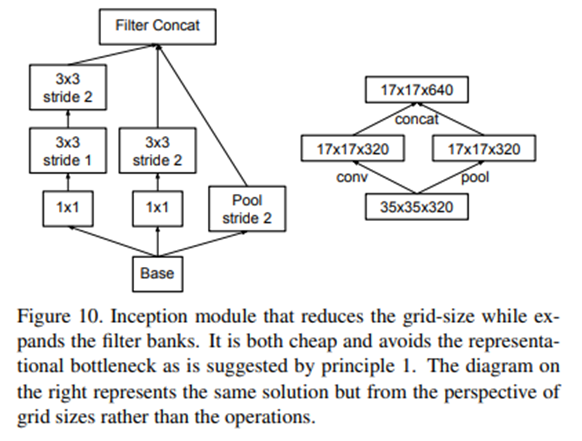

In [18]:
class InceptionRed(nn.Module):
    def __init__(self, in_channels, f_3x3_r, add_ch = 0):
        super().__init__()
        self.branch1 = nn.Sequential(
            ConvBlock(in_channels, f_3x3_r, kernel_size = 1, stride = 1, padding = 0),
            ConvBlock(f_3x3_r, 178 + add_ch, kernel_size = 3, stride = 1, padding = 1),
            ConvBlock(178 + add_ch, 178 + add_ch, kernel_size = 3, stride = 2, padding = 0)
        )
        self.branch2 = nn.Sequential(
            ConvBlock(in_channels, f_3x3_r, kernel_size = 1, stride = 1, padding = 0),
            ConvBlock(f_3x3_r, 302 + add_ch, kernel_size = 3, stride = 2, padding = 0)
        )
        self.branch3 = nn.MaxPool2d(3, stride = 2, padding = 0)
        
    def forward(self,x):
        b1 = self.branch1(x)
        b2 = self.branch2(x)
        b3 = self.branch3(x)
        return torch.cat([b1, b2, b3], dim = 1)

block = InceptionRed(768, f_3x3_r = 192, add_ch = 16)
summary(block, (1,768,299,299))

Layer (type:depth-idx)                   Output Shape              Param #
InceptionRed                             [1, 1280, 149, 149]       --
├─Sequential: 1-1                        [1, 194, 149, 149]        --
│    └─ConvBlock: 2-1                    [1, 192, 299, 299]        --
│    │    └─Sequential: 3-1              [1, 192, 299, 299]        148,032
│    └─ConvBlock: 2-2                    [1, 194, 299, 299]        --
│    │    └─Sequential: 3-2              [1, 194, 299, 299]        335,814
│    └─ConvBlock: 2-3                    [1, 194, 149, 149]        --
│    │    └─Sequential: 3-3              [1, 194, 149, 149]        339,306
├─Sequential: 1-2                        [1, 318, 149, 149]        --
│    └─ConvBlock: 2-4                    [1, 192, 299, 299]        --
│    │    └─Sequential: 3-4              [1, 192, 299, 299]        148,032
│    └─ConvBlock: 2-5                    [1, 318, 149, 149]        --
│    │    └─Sequential: 3-5              [1, 318, 149, 149]      

In [24]:
class InceptionAux(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.block = nn.Sequential(
            nn.AdaptiveAvgPool2d((4,4)),
            nn.Conv2d(in_channels, 128, kernel_size = 1, stride = 1, padding = 0),
            nn.ReLU(inplace = True)
        )
        self.classifier = nn.Sequential(
            nn.Linear(2048, 1024),
            nn.Dropout(0.7),
            nn.Linear(1024, num_classes)
        )
        
    def forward(self,x):
        out = self.block(x)
        out = torch.flatten(out, 1)
        out = self.classifier(out)
        return out

In [39]:
class InceptionV2(nn.Module):
    def __init__(self, aux_logits = True, num_classes = 10):
        super().__init__()
        assert aux_logits == True or aux_logits == False

        self.aux_logits = aux_logits
        
        self.conv1 = ConvBlock(3, 32, kernel_size = 3, stride = 2, padding = 0)
        self.conv2 = ConvBlock(32, 32, kernel_size = 3, stride = 1, padding = 0)
        self.conv3 = ConvBlock(32, 64, kernel_size = 3, stride = 1, padding = 1)
        self.maxpool1 = nn.MaxPool2d(3, stride = 2, padding = 0)
        self.conv4 = ConvBlock(64, 80, kernel_size = 3, stride = 1, padding = 0)
        self.conv5 = ConvBlock(80, 192, kernel_size = 3, stride = 2, padding = 0)
        self.conv6 = ConvBlock(192, 288, kernel_size = 3, stride = 1, padding = 1)
        
        self.inception3a = InceptionF5(288)
        self.inception3b = InceptionF5(288)
        self.inception3c = InceptionF5(288)
        
        self.inceptionRed1 = InceptionRed(288, f_3x3_r = 64, add_ch = 0)
        
        self.inception4a = InceptionF6(768, f_7x7 = 128)
        self.inception4b = InceptionF6(768, f_7x7 = 160)
        self.inception4c = InceptionF6(768, f_7x7 = 160)
        self.inception4d = InceptionF6(768, f_7x7 = 160)
        self.inception4e = InceptionF6(768, f_7x7 = 192)
        
        self.inceptionRed2 = InceptionRed(768, f_3x3_r = 192, add_ch = 16)
        
        if self.aux_logits:
            self.aux = InceptionAux(768, num_classes)
        else:
            self.aux = None
        
        self.inception5a = InceptionF7(1280)
        self.inception5b = InceptionF7(2048)
        
        self.avg = nn.AdaptiveAvgPool2d((1,1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(2048, num_classes)
        
        self._init_layer()
    
    def _init_layer(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode = 'fan_out', nonlinearity = 'relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.maxpool1(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = self.conv6(out)

        out = self.inception3a(out)
        out = self.inception3b(out)
        out = self.inception3c(out)
        out = self.inceptionRed1(out)

        out = self.inception4a(out)
        out = self.inception4b(out)
        out = self.inception4c(out)
        out = self.inception4d(out)
        out = self.inception4e(out)
        
        
        if self.aux_logits and self.training:
            aux = self.aux(out)
        out = self.inceptionRed2(out)
        
        out = self.inception5a(out)
        out = self.inception5b(out)
        
        out = self.avg(out)
        out = self.dropout(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)

        if self.aux_logits and self.training:
            return out, aux
        else:
            return out

In [80]:
model = InceptionV2(num_classes = 1000)
summary(model, (1,3,299,299))

Layer (type:depth-idx)                        Output Shape              Param #
InceptionV2                                   [1, 1000]                 3,221,608
├─ConvBlock: 1-1                              [1, 32, 149, 149]         --
│    └─Sequential: 2-1                        [1, 32, 149, 149]         --
│    │    └─Conv2d: 3-1                       [1, 32, 149, 149]         864
│    │    └─BatchNorm2d: 3-2                  [1, 32, 149, 149]         64
│    │    └─ReLU: 3-3                         [1, 32, 149, 149]         --
├─ConvBlock: 1-2                              [1, 32, 147, 147]         --
│    └─Sequential: 2-2                        [1, 32, 147, 147]         --
│    │    └─Conv2d: 3-4                       [1, 32, 147, 147]         9,216
│    │    └─BatchNorm2d: 3-5                  [1, 32, 147, 147]         64
│    │    └─ReLU: 3-6                         [1, 32, 147, 147]         --
├─ConvBlock: 1-3                              [1, 64, 147, 147]         --
│    └─Se